<a href="https://colab.research.google.com/github/KerliS9/Cientista-de-dados/blob/master/Introdu%C3%A7%C3%A3o_%C3%A0_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
print(sns.__version__)

0.10.1


#Analisando as notas em geral com Ratings

In [2]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Importado biblioteca do Pandas e arquivo ratings.csv que foi baixado do Movie Lens. Notas head mostra as médias dos 5 primeiros filmes do arquivo.

In [3]:
notas.shape

(100836, 4)

Qual o tamanho do arquivo analisado, linhas e colunas.

In [4]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Traduzindo do inglês para o português.

In [5]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Unique, quais os valores únicos das notas que formam a média.

In [6]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


mean é a média. median é a mediana. Neste caso as duas são bem próximos. Ao incluir as palavras Média e Mediana, este dado também é impresso junto com o resultado do código.

In [8]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

nota é entendido pelo programa como a coluna nota, não necessitando de colchetes e aspa.

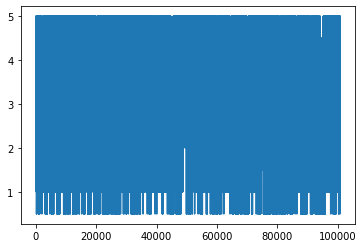

In [9]:
notas.nota.plot()

Plot transforma os dados em gráfico. Neste formato, o gráfico esta ligando índice com a nota. Esta imagem não é útil para análise.

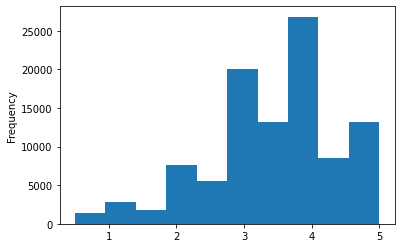

In [10]:
notas.nota.plot(kind='hist')

Ao incluir o tipo histograma, o gráfico fica correto. Aparecem a quantidade de vezes que cada nota apareceu em toda a base.

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#Importando o Seaborn para visualização

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


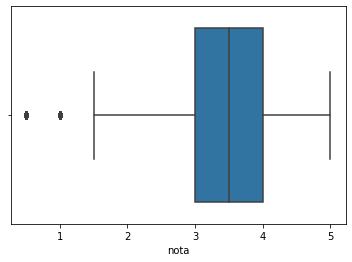

In [12]:
import seaborn as sns
sns.boxplot(notas.nota)

A biblioteca Seaborn facilita a visualização dos dados. Com o boxplot apresenta a concentração das notas. A mediana fica na liga no meio da caixa, 25% acima e 25% abaixo da mediana. As linhas que se estendem para fora da caixa, são os outros 25% para cima e para baixo da mediana.
Com isso, concluímos que metade das notas é entre 3 e 4.

#Incluindo o arquivo Movies e suas análises

In [13]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Na primeira linha é solicitado para o programa ler um novo arquivo.
Segunda, as colunas deste arquivo são traduzidas para Português.

In [14]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


As cinco primeiras notas realizadas no Movie Lens.

In [15]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

Query estou fazendo uma pergunta para o programa. == solicito para comparar.
Neste caso, quais são as notas que o filme 1 teve.
Ao incluir *.nota* ao final mostra somente as notas que o filme recebeu e em qual linha do arquivo este dado se encontra.

In [16]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

Mostra a média das notas do filme 1 - Toy Story.

In [17]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

Mostra a média das notas do filme 2 - Jumanji.

#Agrupando dados

In [18]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


groupby agrupa as notas pelo filme.  E o mean apresenta a média de cada filme.


In [19]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Ao incluir "nota" na análise, a tabela vai mostrar somente o filme e sua média.
medias por filme para a ser uma váriavel.

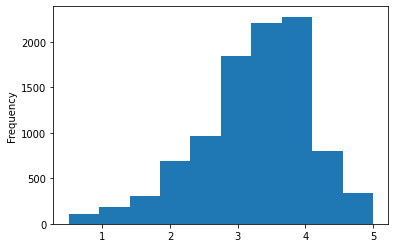

In [20]:
medias_por_filme.plot(kind='hist')

Mostra as médias por filme em forma de gráfico.
Cada linha no eixo y representa um filme.

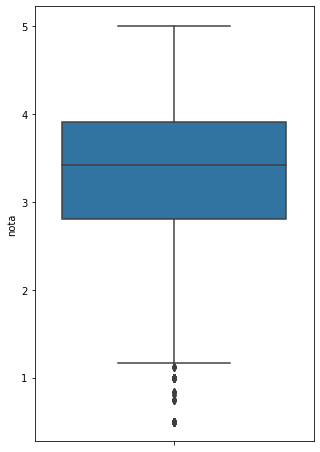

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

As medias dos filmes se concentram entre 2,8 e 3,9, aproximadamente.
Não é necessário incluir .nota na linha do código pois estamos analisando somente uma série.
Ao definir X ou Y, informo a apresentação dos dados que são necessárias.
Figsize é o ajuste do tamanho do gráfico.

In [22]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

Descreve de forma precisa as faixas que se concentram as médias dos filmes.

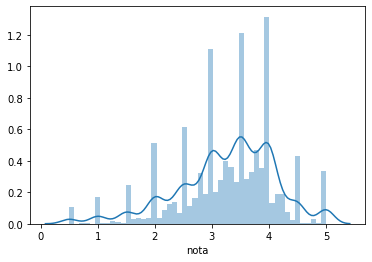

In [23]:
sns.distplot(medias_por_filme, bins=50)

Fazer histograma pelo Seaborn permite a ampliação de colunas, em relação aos pandas, ao definirmos o bins (caixas).
A melhor opção, normalmente é não definir os bins para não influenciar na análise realizada pelo Seaborn.

Text(0.5, 1.0, 'Histograma das médias por filme')

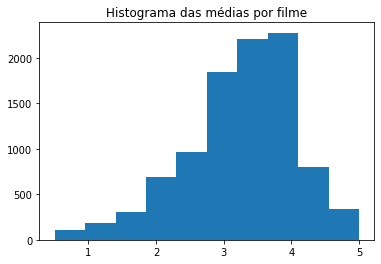

In [24]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias por filme")

Essa biblioteca roda por trás do Seaborn/Pandas. É a mais simples de todas.
Da mesma forma que as outras duas, esta biblioteca também permite ajustes nos gráficos, neste caso, foi inserido um título.
Em data visualization é ensinado qual biblioteca apresenta os melhores recursos para apresentação dos dados.

#Incluindo dados do TMDB 5000 - KAGGLE

In [25]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Apresenta todas as linguagens originais, é uma categoria nominal/única.

In [27]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

Quais foram as notas dadas pelos usuários.

In [28]:
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ar       2
id       2
ro       2
ps       1
hu       1
xx       1
ky       1
af       1
no       1
is       1
el       1
sl       1
pl       1
vi       1
te       1
tr       1
nb       1
Name: original_language, dtype: int64

Quantas vezes aparecem cada idioma.
Quando é extraído somente uma coluna, o dado extraído é chamado de Series.

In [29]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ar', 'id', 'ro', 'ps',
       'hu', 'xx', 'ky', 'af', 'no', 'is', 'el', 'sl', 'pl', 'vi', 'te', 'tr',
       'nb'],
      dtype='object')

Nesta separamos somente o índice.

In [30]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Nesta temos, os valores.

#Tratando os dados, de series para data frame

In [31]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Com o to_frame transformamos a series em data frame. Com o reset, os idiomas passam a ser o índice do arquivo.
contagem de lingua é uma váriavel criada.
.columns - alterado os títulos de cada coluna

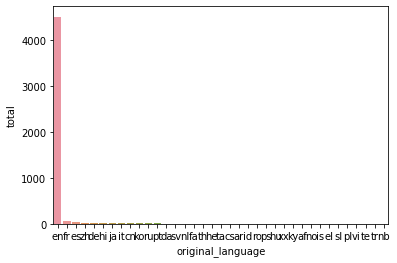

In [32]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

barplot é um tipo de gráfico do seaborn, onde definimos quais os dados que devem aparecer no eixo x e no eixo y, analisando sobre o data frame criado, contagem de língua.
Para este gráfico é necessário tratar os dados, tornando em data frame.

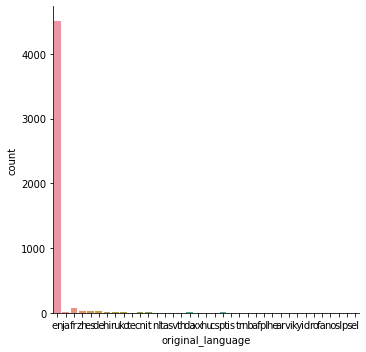

In [33]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

Catplot, apresenta os dados em gráfico sem precisar de tratamento. Para o eixo y, definimos que o Cat deveria contar (kind=count), x = original languages, dentro da Series Data=tmdb.

([<matplotlib.patches.Wedge at 0x7f4c83b384a8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

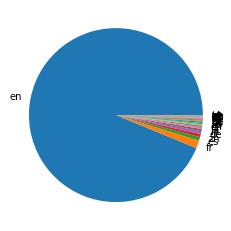

In [37]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

Pie é o gráfico de pizza, normalmente não recomendado para análises, devido a dificuldade de mensuração de área.

In [43]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
total_de_ingles, total_do_resto

(4505, 298)

Para facilitar a transmissão de mensagem que quero passar com estes dados, devo melhorar a apresentação dos mesmos. Neste caso, comparando a frequencia do idioma En com os demais.
.Sum, me apresenta o total das frequencias de todos os idiomas.
Com loc (localizar) separo o total do idioma En.
Em formato de conta, subtraio o En da informação total.

In [50]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


Defini as linhas (lingua e outros) e as informações que devem ser corrrespondentes.
Com pd.dataframe ajustei a apresentação dos dados para um data frame.

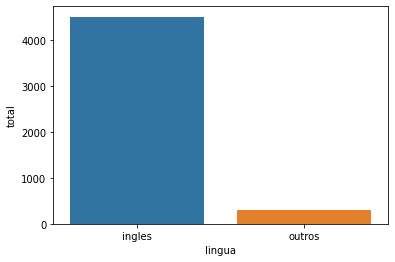

In [51]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

Apresentando os dados por meio dum gráfico de barras.
As linhas de códigos podem ser agrupadas e ao definirmos o formato do Data Frame já apresentamos em gráfico.